In [1]:
# This workbook describes a look at the IMOS gridded data available at:
# http://thredds.aodn.org.au/thredds/catalog/IMOS/ANMN/NSW/catalog.html

# In this example we are looking at the BMP120 mooring gridded timeseries

In [2]:
# install requirements
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import sys
%matplotlib inline

In [3]:
#path to data - now saved in local directory
datapath = 'data\\'

# create dataframe
bmp120gt = xr.open_dataset(datapath + 'IMOS_ANMN-NSW_TZ_20110329_BMP120_FV02_TEMP-gridded-timeseries_END-20200327_C-20200519.nc')
#bmp120gt aka
display(bmp120gt)

<xarray.Dataset>
Dimensions:     (DEPTH: 12, TIME: 67626)
Coordinates:
  * TIME        (TIME) datetime64[ns] 2011-03-29T22:00:00 ... 2020-03-27T20:00:00
  * DEPTH       (DEPTH) float32 10.0 20.0 30.0 40.0 ... 90.0 100.0 110.0 120.0
    LATITUDE    float64 ...
    LONGITUDE   float64 ...
Data variables:
    TEMP_count  (TIME) int16 ...
    TEMP        (TIME, DEPTH) float32 ...
Attributes:
    Conventions:                 CF-1.6,IMOS-1.4
    abstract:                    Gridded Time Series Product: This file conta...
    acknowledgement:             Any users of IMOS data are required to clear...
    author:                      Klein, Eduardo
    author_email:                eduardo.kleinsalas@utas.edu.au
    citation:                    The citation in a list of references is: "IM...
    contributor_email:           mroughan@unsw.edu.au; t.austin@unsw.edu.au
    contributor_name:            Roughan, Moninya; Austin, Timothy
    contributor_role:            principal_investigator; author
    data_centre:                 Australian Ocean Data Network (AODN)
    data_centre_email:           info@aodn.org.au
    date_created:                2020-05-19T09:10:37Z
    disclaimer:                  Data, products and services from IMOS are pr...
    featureType:                 timeSeriesProfile
    file_version:                Level 2 - Gridded Data
    generating_code_version:     1.3.2
    geospatial_lat_max:          -36.2012166667
    geospatial_lat_min:          -36.21525
    geospatial_lon_max:          150.31775
    geospatial_lon_min:          150.3078333333
    geospatial_vertical_max:     120
    geospatial_vertical_min:     10
    history:                     2020-05-19T08:54:32Z: Hourly aggregated file...
    included_values_flagged_as:  Good_data, Probably_good_data
    institution_references:      http://imos.org.au/facilities/aodn/
    keywords:                    TEMP, DEPTH, HOURLY, GRIDDED
    keywords_vocabulary:         IMOS parameter names. See https://github.com...
    license:                     http://creativecommons.org/licenses/by/4.0/
    lineage:                     The Variable of Interest (VoI) is produced b...
    naming_authority:            IMOS
    project:                     Integrated Marine Observing System (IMOS)
    references:                  http://www.imos.org.au
    site_code:                   BMP120
    source:                      Mooring
    source_file:                 IMOS/ANMN/NSW/BMP120/hourly_timeseries/IMOS_...
    source_file_download:        https://s3-ap-southeast-2.amazonaws.com/imos...
    source_file_opendap:         http://thredds.aodn.org.au/thredds/dodsC/IMO...
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Metadata Co...
    time_coverage_end:           2020-03-27T20:00:00Z
    time_coverage_start:         2011-03-29T22:00:00Z
    title:                       Gridded Time Series Product: TEMP interpolat...

In [4]:
# display TEMP parameter in data frame
bmp120gt.TEMP
# 1h gridded. 67k data points / 24*365 = 7.71 years @ 1h
# should be 9 years 7.71/9 = 86%

<xarray.DataArray 'TEMP' (TIME: 67626, DEPTH: 12)>
[811512 values with dtype=float32]
Coordinates:
  * TIME       (TIME) datetime64[ns] 2011-03-29T22:00:00 ... 2020-03-27T20:00:00
  * DEPTH      (DEPTH) float32 10.0 20.0 30.0 40.0 ... 90.0 100.0 110.0 120.0
    LATITUDE   float64 -36.21
    LONGITUDE  float64 150.3
Attributes:
    standard_name:  sea_water_temperature
    units:          degrees_Celsius
    cell_methods:   TIME:median DEPTH: point
    valid_min:      -2.5
    long_name:      sea_water_temperature
    valid_max:      40.0

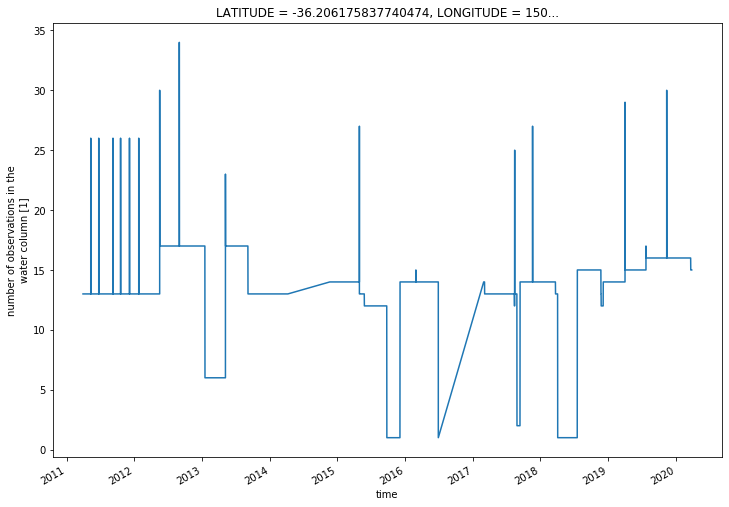

In [36]:
# How is this product calculated?
bmp120gt.TEMP_count.plot()
# So it looks at entire thermistor string up to 15 values (spikes overlap at each deployment) 
# Fits a line (to all points? or just closest)

# or Not  - is this is just counting no of temps at each point in time - need to look at specific grid depth
# bmp120gt.TEMP_count.sel(DEPTH=30).plot()
# doesnt like this

In [6]:
# display DEPTH parameter
bmp120gt.DEPTH
# 10m gridded

<xarray.DataArray 'DEPTH' (DEPTH: 12)>
array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.],
      dtype=float32)
Coordinates:
  * DEPTH      (DEPTH) float32 10.0 20.0 30.0 40.0 ... 90.0 100.0 110.0 120.0
    LATITUDE   float64 -36.21
    LONGITUDE  float64 150.3
Attributes:
    reference_datum:  sea surface
    standard_name:    depth
    units:            m
    positive:         down
    valid_min:        -5.0
    long_name:        target depth
    valid_max:        12000.0

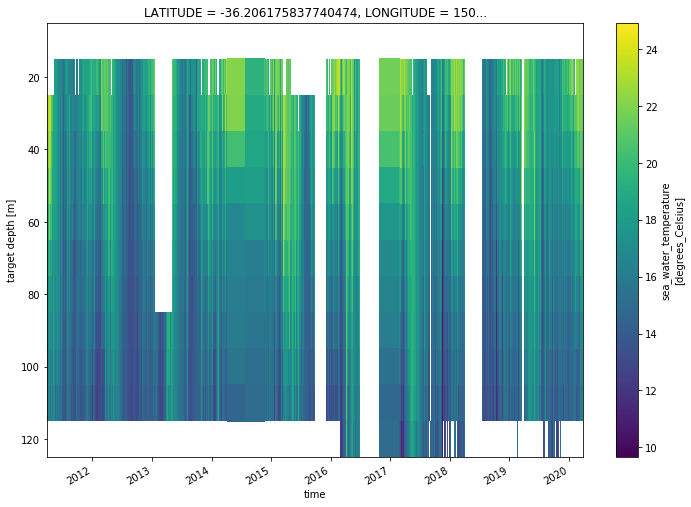

In [7]:
# Plot 1 of temp with time/depth

# set up figure size
plt.rcParams['figure.figsize'] = (12,8) # width, height
# Create plot 
bmp120gt.TEMP.plot(x = 'TIME',yincrease=False)

# Notes: 
# Looks strange as a function of binning data to 10m bins
# losing 20m Bin to layover
# 120m Bin arbitrary function of mooring deployment depth. Suggest forcing 120m Bin to take value of T1.

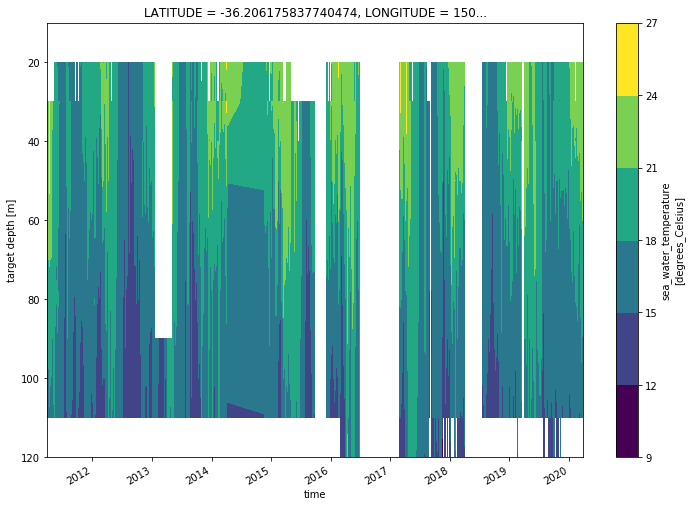

In [8]:
# Plot 2 - contour of temp with time/depth
 
bmp120gt.TEMP.plot.contourf(x = 'TIME',yincrease=False)
plt.savefig('BMP2020griddedContourf')

# Notes: 
# Contour plot smooths Temp data so looking more realistic now.
# Not very useful at this resolution.
# Need to look closer at data gaps.. Line up with deployments. 

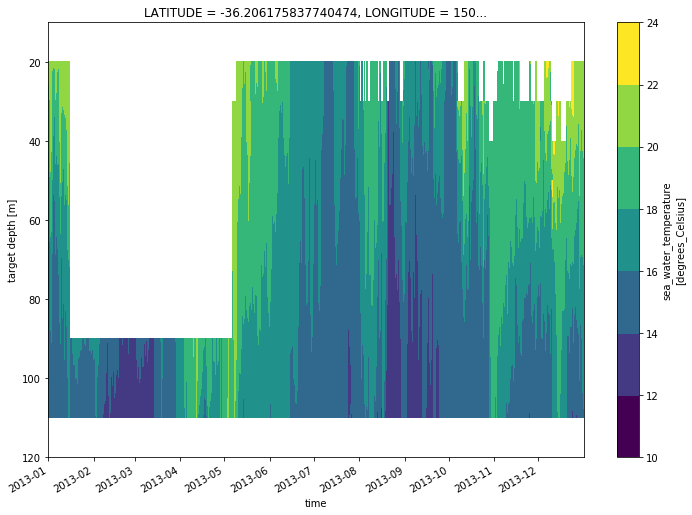

In [9]:
# Look closer at data gaps - early 2013
bmp120gt_slice13 = bmp120gt.TEMP.loc['2013':'2013']     
bmp120gt_slice13.plot.contourf(x = 'TIME',yincrease=False)

# refer Word doc for these images

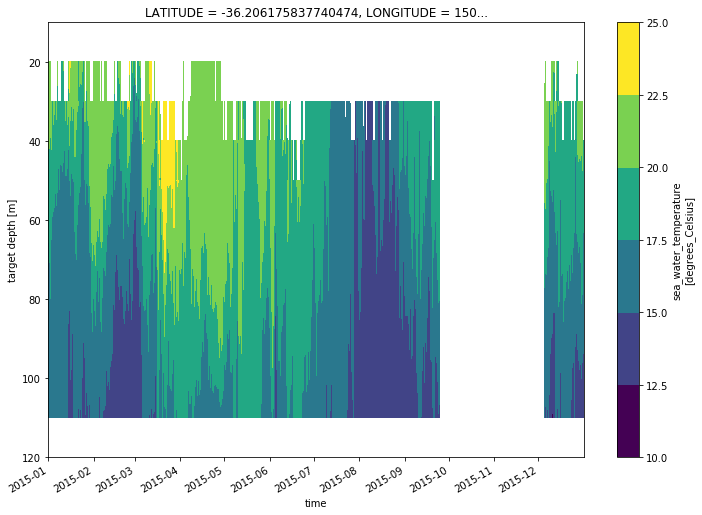

In [10]:
# Look closer at data gaps - late 2015
bmp120gt_slice15 = bmp120gt.TEMP.loc['2015':'2015']     
bmp120gt_slice15.plot.contourf(x = 'TIME',yincrease=False)

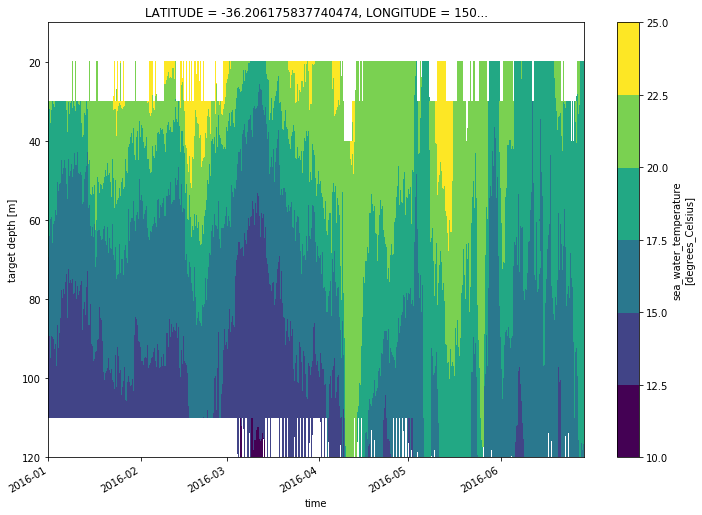

In [11]:
# Look closer at data gaps - 2nd half 2016
bmp120gt_slice16 = bmp120gt.TEMP.loc['2016':'2016']     
bmp120gt_slice16.plot.contourf(x = 'TIME',yincrease=False)

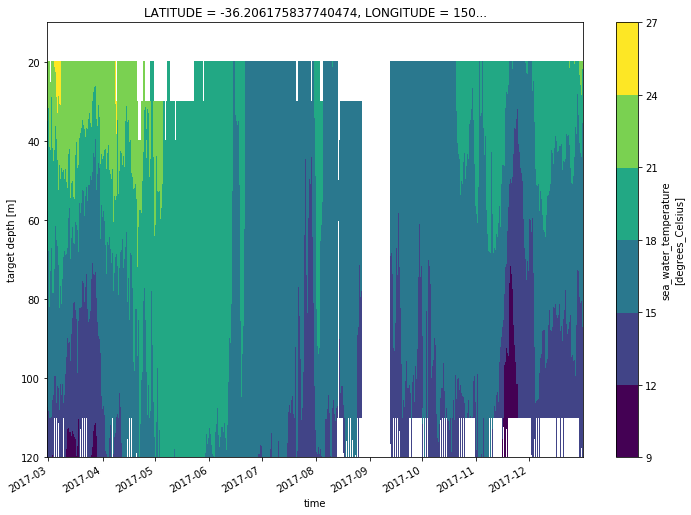

In [12]:
# Look closer at data gaps - 2 gaps in 2017
bmp120gt_slice17 = bmp120gt.TEMP.loc['2017':'2017']     
bmp120gt_slice17.plot.contourf(x = 'TIME',yincrease=False)

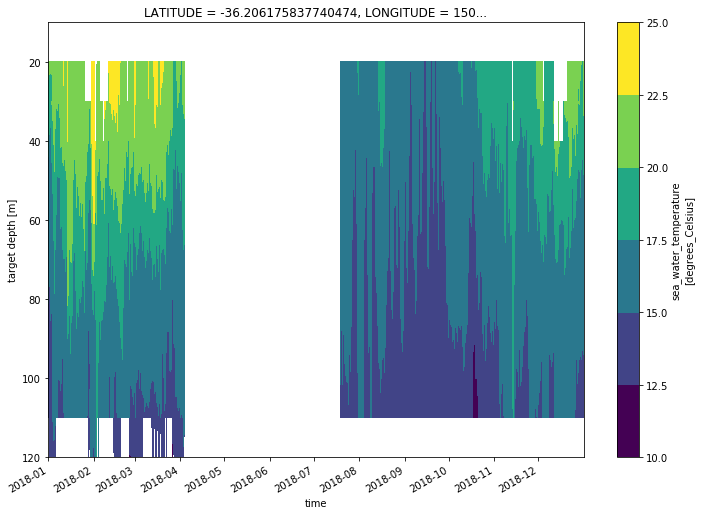

In [13]:
# Look closer at data gaps - Mid 2018
bmp120gt_slice18 = bmp120gt.TEMP.loc['2018':'2018']     
bmp120gt_slice18.plot.contourf(x = 'TIME',yincrease=False)

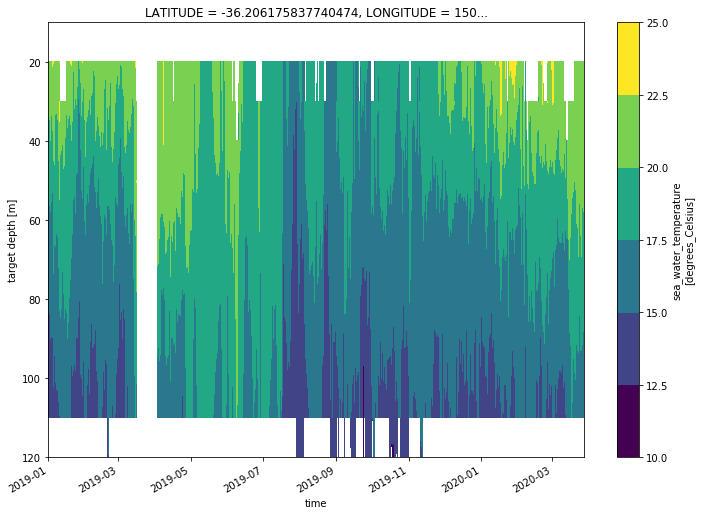

In [14]:
# Look closer at data gaps - March 2019
bmp120gt_slice19 = bmp120gt.TEMP.loc['2019':'2020']     
bmp120gt_slice19.plot.contourf(x = 'TIME',yincrease=False)

Text(0.5, 1.0, 'BMP120 @20m')

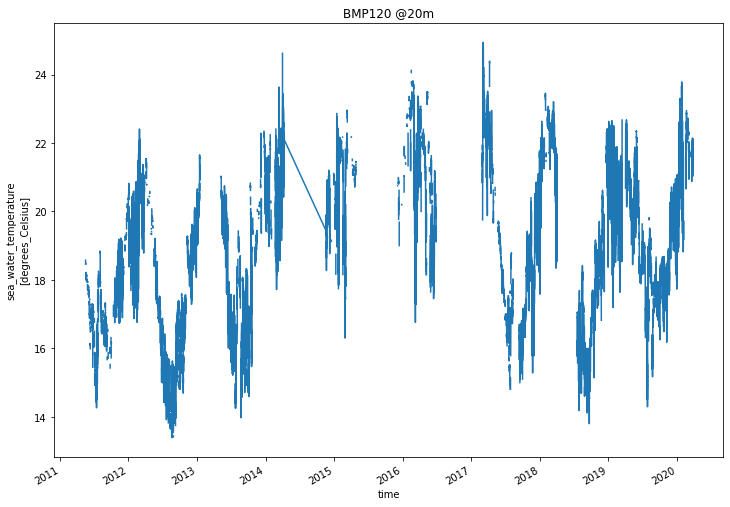

In [15]:
# Plot - pick a depth and look at temp vs time
bmp120gt.TEMP.sel(DEPTH=20).plot(x = 'TIME')
plt.title('BMP120 @20m')

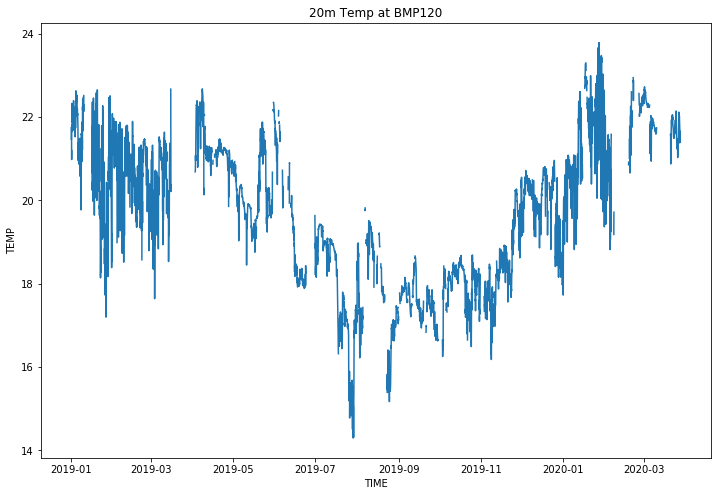

In [16]:
# Lets look closer at a subset of this data, and the strange features

x = bmp120gt.TIME
y = bmp120gt.TEMP.sel(DEPTH=20)
xslice = x.loc['2019':'2020'] 
yslice = y.loc['2019':'2020'] 
plt.plot(xslice,yslice)

plt.title('20m Temp at BMP120')
plt.ylabel('TEMP')
plt.xlabel('TIME')
plt.show()

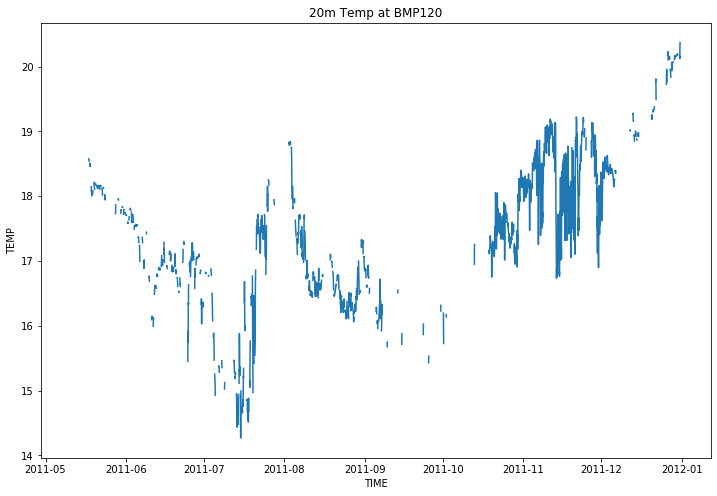

In [17]:
# 2019-20 is not looking too bad, but what about 2011?

x = bmp120gt.TIME
y = bmp120gt.TEMP.sel(DEPTH=20)
xslice = x.loc['2011':'2011'] 
yslice = y.loc['2011':'2011'] 
plt.plot(xslice,yslice)

plt.title('20m Temp at BMP120')
plt.ylabel('TEMP')
plt.xlabel('TIME')
plt.show()

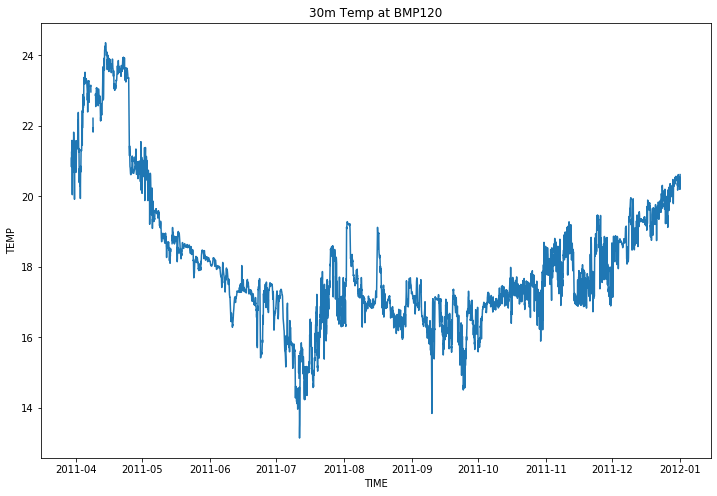

In [18]:
# Data is patchy/sparse, function of layover.

# Lets plot 30m depth to check

x = bmp120gt.TIME
y = bmp120gt.TEMP.sel(DEPTH=30)
xslice = x.loc['2011':'2011'] 
yslice = y.loc['2011':'2011'] 
plt.plot(xslice,yslice)

plt.title('30m Temp at BMP120')
plt.ylabel('TEMP')
plt.xlabel('TIME')
plt.show()

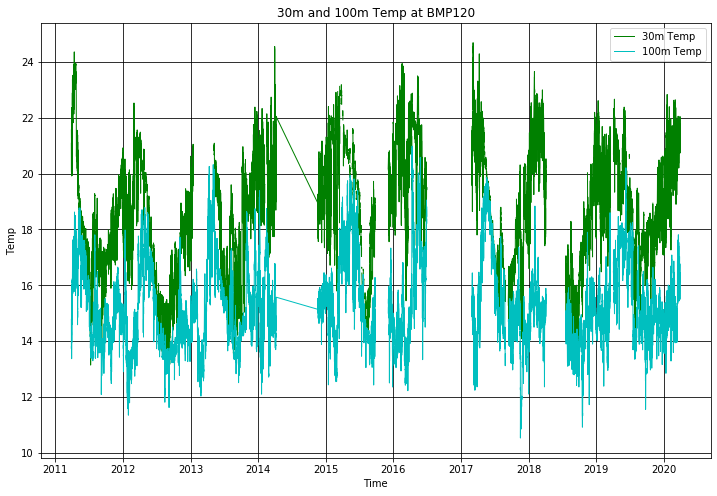

In [19]:
# A much better data record at 30m

# Next question - can we overlay more than 1 depth

x = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

plt.figure(figsize=(12,8)) # width, height
plt.plot(x ,y1 ,'g',label='30m Temp', linewidth=1)
plt.plot(x,y2,'c',label='100m Temp',linewidth=1)
plt.title('30m and 100m Temp at BMP120')
plt.ylabel('Temp')
plt.xlabel('Time')
plt.legend()
plt.grid(True,color='k')
plt.show()

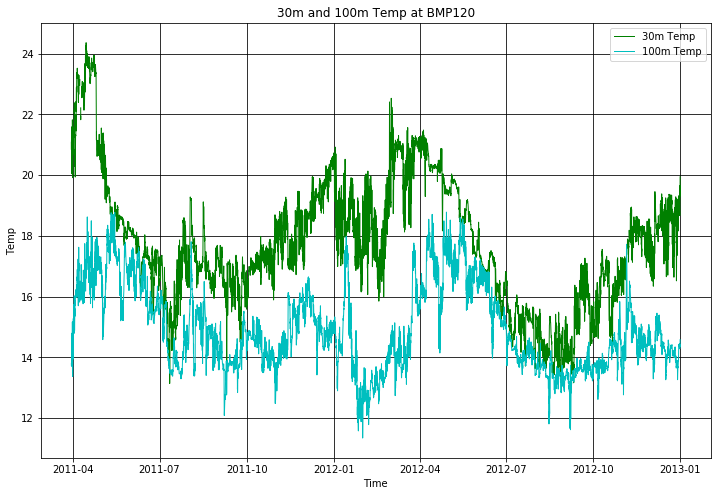

In [20]:
# So yes, eventually - but getting muddy. Can we slice it by time so its clearer.

x = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

x_2011 = x.loc['2011':'2012'] 
y1_2011 = y1.loc['2011':'2012'] 
y2_2011 = y2.loc['2011':'2012'] 

plt.figure(figsize=(12,8)) # width, height
plt.plot(x_2011 ,y1_2011 ,'g',label='30m Temp', linewidth=1)
plt.plot(x_2011,y2_2011,'c',label='100m Temp',linewidth=1)
plt.title('30m and 100m Temp at BMP120')
plt.ylabel('Temp')
plt.xlabel('Time')
plt.legend()
plt.grid(True,color='k')

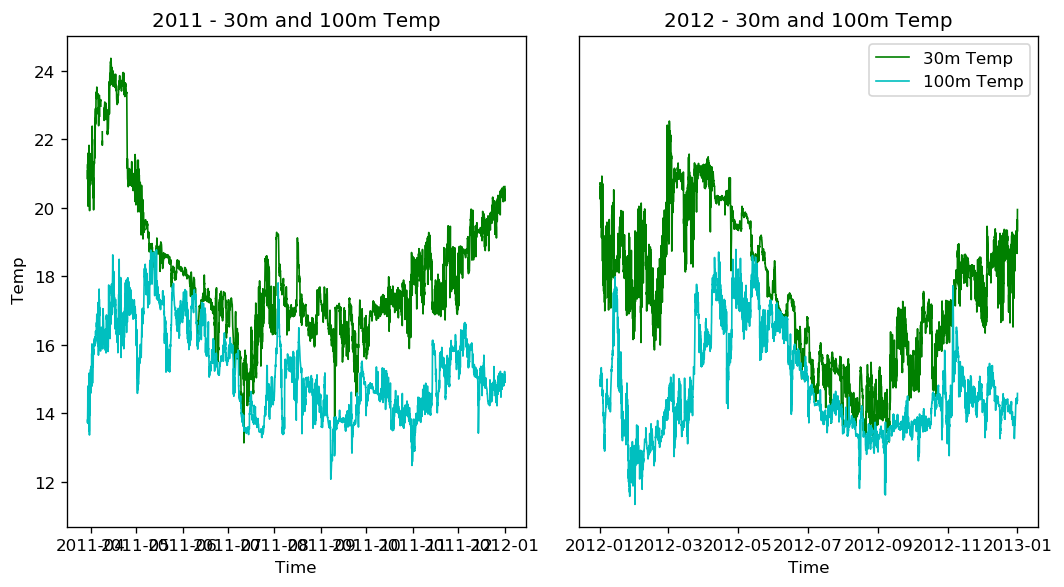

In [21]:
# Now using subplots to show a couple of years side by side

x1 = x2 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
ax1.plot(x1.loc['2011':'2011'],y1.loc['2011':'2011'],'g',label='30m Temp', linewidth=1)
ax1.plot(x2.loc['2011':'2011'],y2.loc['2011':'2011'],'c',label='100m Temp', linewidth=1)

ax2.plot(x1.loc['2012':'2012'],y1.loc['2012':'2012'],'g',label='30m Temp', linewidth=1)
ax2.plot(x2.loc['2012':'2012'],y2.loc['2012':'2012'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title etc
ax1.set_title('2011 - 30m and 100m Temp'); ax2.set_title('2012 - 30m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

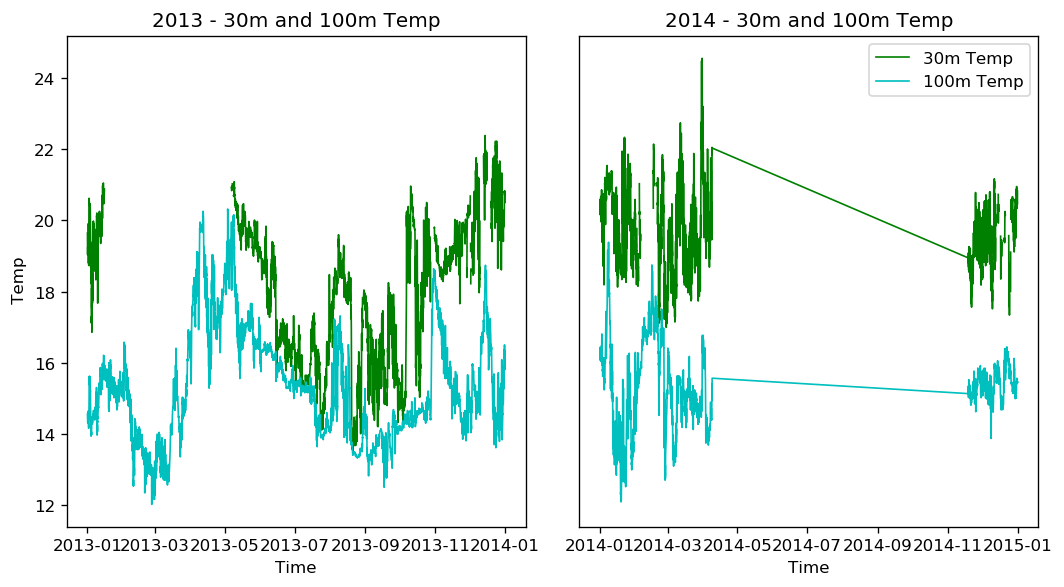

In [22]:
# Similarly for 2013/14

x1 = x2 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
ax1.plot(x1.loc['2013':'2013'],y1.loc['2013':'2013'],'g',label='30m Temp', linewidth=1)
ax1.plot(x2.loc['2013':'2013'],y2.loc['2013':'2013'],'c',label='100m Temp', linewidth=1)

ax2.plot(x1.loc['2014':'2014'],y1.loc['2014':'2014'],'g',label='30m Temp', linewidth=1)
ax2.plot(x2.loc['2014':'2014'],y2.loc['2014':'2014'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title etc
ax1.set_title('2013 - 30m and 100m Temp'); ax2.set_title('2014 - 30m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

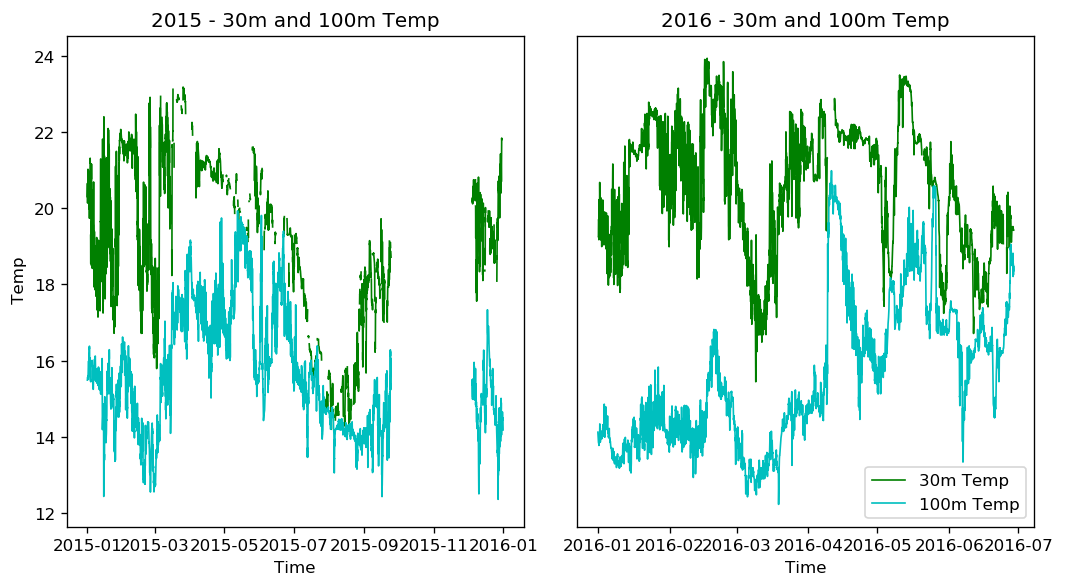

In [23]:
# Similarly for 2015/16

x1 = x2 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
ax1.plot(x1.loc['2015':'2015'],y1.loc['2015':'2015'],'g',label='30m Temp', linewidth=1)
ax1.plot(x2.loc['2015':'2015'],y2.loc['2015':'2015'],'c',label='100m Temp', linewidth=1)

ax2.plot(x1.loc['2016':'2016'],y1.loc['2016':'2016'],'g',label='30m Temp', linewidth=1)
ax2.plot(x2.loc['2016':'2016'],y2.loc['2016':'2016'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title etc
ax1.set_title('2015 - 30m and 100m Temp'); ax2.set_title('2016 - 30m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

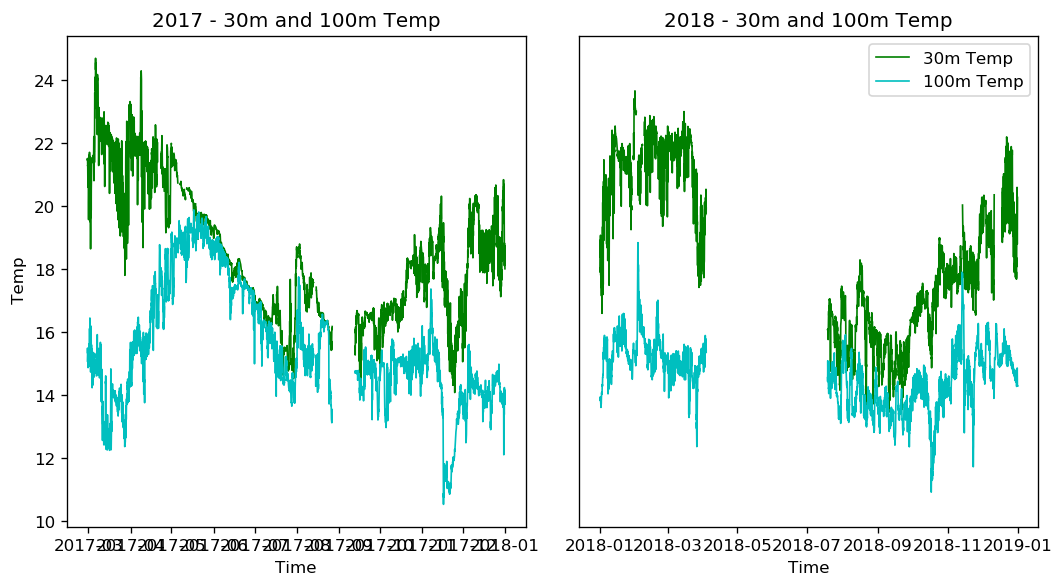

In [24]:
# Similarly for 2017/18

x1 = x2 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
ax1.plot(x1.loc['2017':'2017'],y1.loc['2017':'2017'],'g',label='30m Temp', linewidth=1)
ax1.plot(x2.loc['2017':'2017'],y2.loc['2017':'2017'],'c',label='100m Temp', linewidth=1)

ax2.plot(x1.loc['2018':'2018'],y1.loc['2018':'2018'],'g',label='30m Temp', linewidth=1)
ax2.plot(x2.loc['2018':'2018'],y2.loc['2018':'2018'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title etc
ax1.set_title('2017 - 30m and 100m Temp'); ax2.set_title('2018 - 30m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

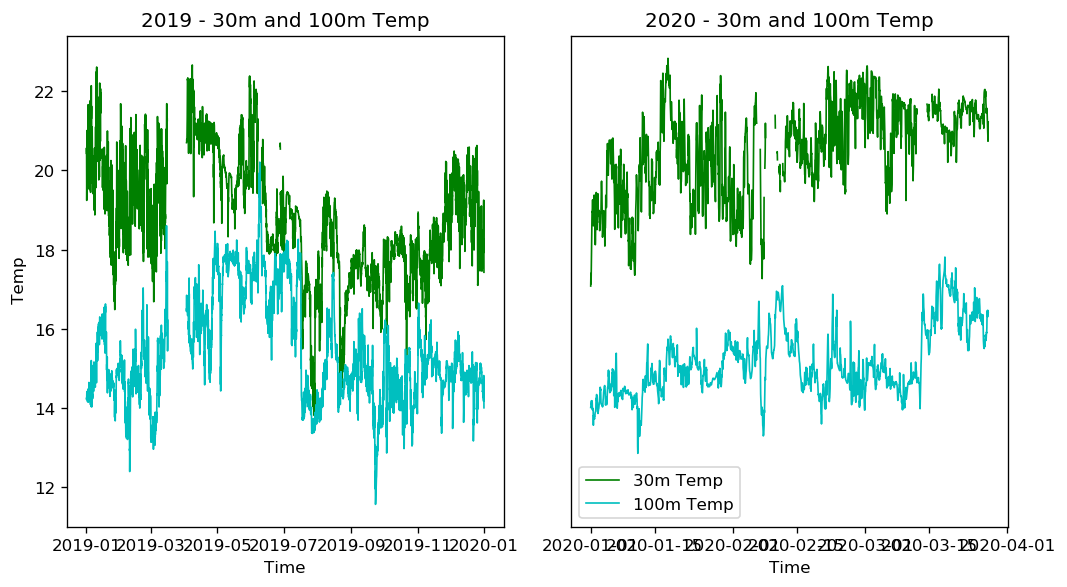

In [25]:
# Similarly for 2017/18

x1 = x2 = bmp120gt.TIME
y1 = bmp120gt.TEMP.sel(DEPTH=30)
y2 = bmp120gt.TEMP.sel(DEPTH=100)

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, dpi=120)

# Plot
ax1.plot(x1.loc['2019':'2019'],y1.loc['2019':'2019'],'g',label='30m Temp', linewidth=1)
ax1.plot(x2.loc['2019':'2019'],y2.loc['2019':'2019'],'c',label='100m Temp', linewidth=1)

ax2.plot(x1.loc['2020':'2020'],y1.loc['2020':'2020'],'g',label='30m Temp', linewidth=1)
ax2.plot(x2.loc['2020':'2020'],y2.loc['2020':'2020'],'c',label='100m Temp',linewidth=1)
plt.legend()

# Title etc
ax1.set_title('2019 - 30m and 100m Temp'); ax2.set_title('2020 - 30m and 100m Temp')
ax1.set_xlabel('Time');  ax2.set_xlabel('Time')  # x label
ax1.set_ylabel(' Temp');  ax2.set_ylabel('')  # y label
ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [26]:
# So lets recap
# I have got this method of visualizing data working but .loc method is fairly tedious.
# Could now make a plot for each year and each depth BUT
# Would be much better to display dynamically
# Refer bmp120gt_plotly for a dynamic plotting method

# Future ideas Oct 2020
# Output plot for each year (with a loop)
# Overlay each years data on each other (to see anomalies)
# depth profiles (animate this?) / match up with ctd casts ?
# xarray animation eg. https://github.com/jbusecke/xmovie
# use groupby to get annual mean in xarray
# improve dataset  - some time points only have 30m temp and below. Interpolate top layer from sst? and ctd casts?
# low pass filter to get rid of noise - also trends

#Questions Oct 2020
# how gridded data set is created

# MOVE TO END
# Note: have created 2 further notebooks to work on dynamic examples in matplotlib 
# (bmp120gt_matplotlibNotebook) and plotly (bmp120gt_plotly). 

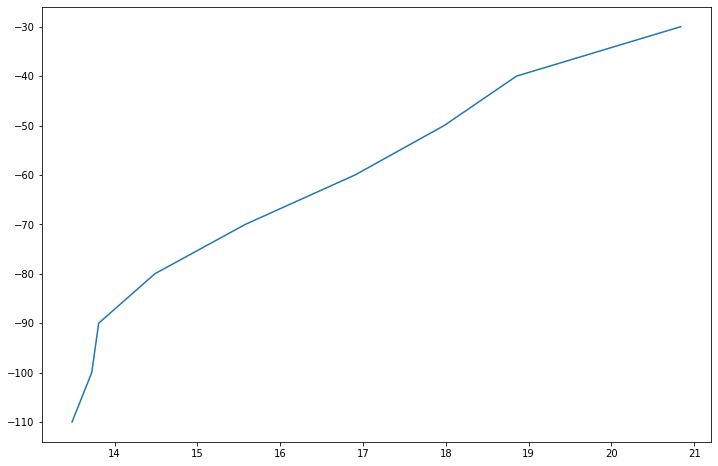

In [27]:
# Next Step

# Create a depth profile at 1 point in time
from matplotlib import pyplot as plt
x = bmp120gt.TEMP.sel(TIME='2011-03-29T23:00:00.000000000')
y = bmp120gt.DEPTH
plt.plot(x,-y)

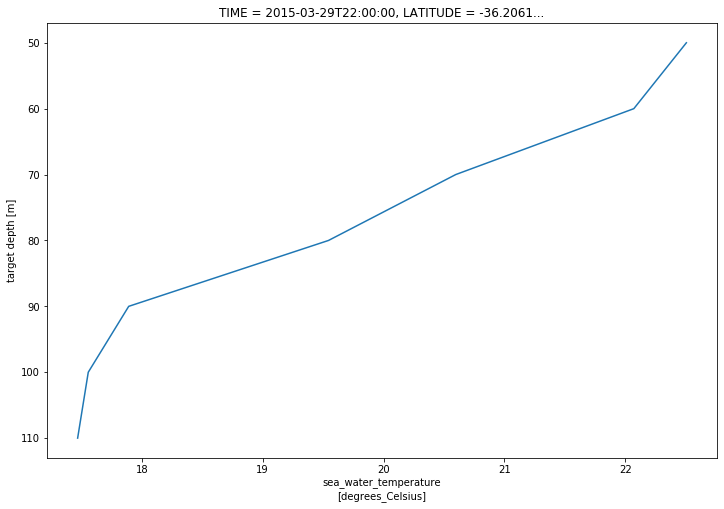

In [28]:
# A tidier method to invert axes

bmp120gt.TEMP.sel(TIME='2015-03-29T22:00:00.000000000').plot(y='DEPTH', yincrease=False)
plt.xlim=0

C:\Users\Stuart\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Average Temp Profile at BMP120')

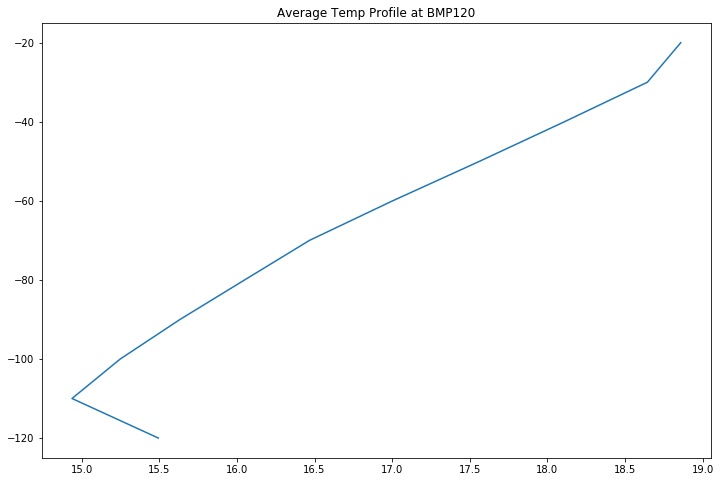

In [29]:
# Now make an average Temp Profile

x = bmp120gt.TEMP.mean(dim='TIME')
y = bmp120gt.DEPTH
plt.plot(x,-y)
plt.title('Average Temp Profile at BMP120')

C:\Users\Stuart\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


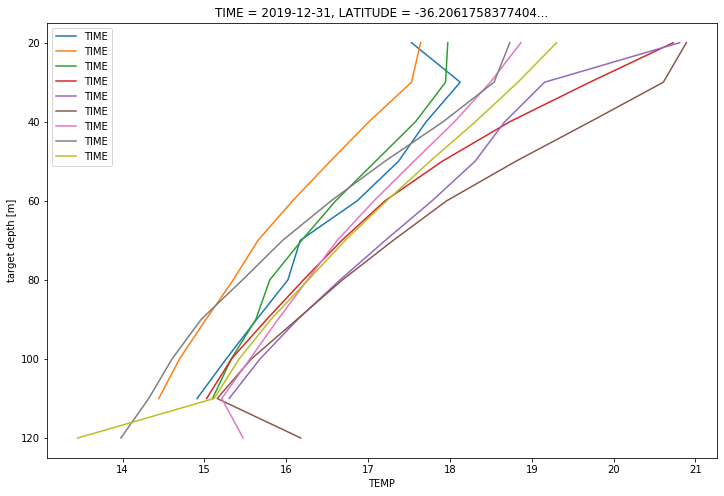

In [30]:
# A look at all the annual means

bmp_annual_means = bmp120gt.TEMP.resample(TIME="1Y").mean()

for x in range(9):
    bmp_annual_means[x].plot(y='DEPTH',yincrease=False, label='TIME')
    
plt.legend()


# how to reference time?

C:\Users\Stuart\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


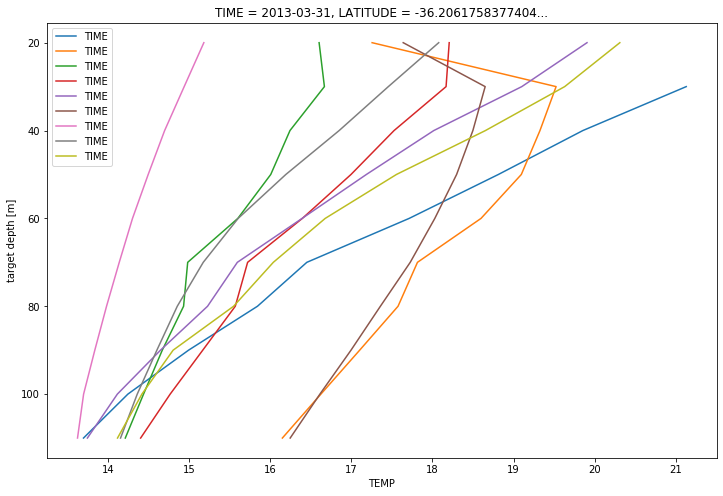

In [31]:
# A look at the 3M seasonal means

bmp_annual_means = bmp120gt.TEMP.resample(TIME="3M").mean()

for x in range(9):
    bmp_annual_means[x].plot(y='DEPTH',yincrease=False, label='TIME')
    
plt.legend()


# not enough lines?

In [32]:
# couple of interesting temp inversions to explore here